# Data Story

Thinking intuitely about the Spotify data and song popularity in general, it seems apparent that clear cut correlations between a song's features and its popularity will be difficult to discern. Two songs may be structured very similarly, and yet may have entirely different popularity scores. On the other side of the coin, two songs with the same popularity score may sound completely different. One song may be fast and the other slow; one may be loud while the other not so much. While pop music may seem rather formulaic to many, cultural tastes are fickle and no one can say for certain which songs will make the cut.<br>
<br>
With these caveats in mind, let's see what the data says visually.

### Load in the data and packages

In [9]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
# See data wrangling report for more details
#load data
spotify = pd.read_csv('../Data/SpotifyFeatures0419.csv')

# Create the sorted dataframe and drop zeros
sort_data = spotify.sort_values('popularity', ascending=False).reset_index()
spotify_ordered = sort_data.drop(['index', 'track_id'], axis=1)
spotify_ordered.index = spotify_ordered.index + 1
spotify_ordered = spotify_ordered[spotify_ordered.popularity > 0]
spotify_ordered[['mode', 'key', 'time_signature']] = \
    spotify_ordered[['mode', 'key', 'time_signature']].astype('category')

In [6]:
# Create dataframe with encoded categorical variables
encoded = spotify_ordered.drop('track_name', axis=1)
encoded = pd.get_dummies(encoded)

(111774, 29833)

In [23]:
#Create table with a column classifying popularity ratings
classified = spotify_ordered.copy()
classified['pop_rating'] = ''

for i, row in classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 50) & (row.popularity < 75):
        score = 'medium'
    elif row.popularity >= 75:
        score = 'popular'
    classified.at[i, 'pop_rating'] = score

### Initial Glance
As the data wrangling report shows, popular songs compared to the entire population are extremely rare, and the ratio between popular and unpopular is severely disproportionate.

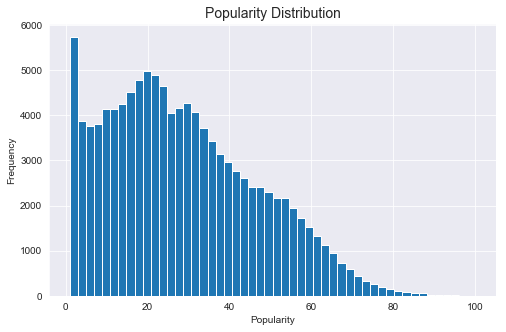

In [12]:
# Inspect shape of popularity variable
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = spotify_ordered['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

The tail towards the upper end of the scale is very narrow.

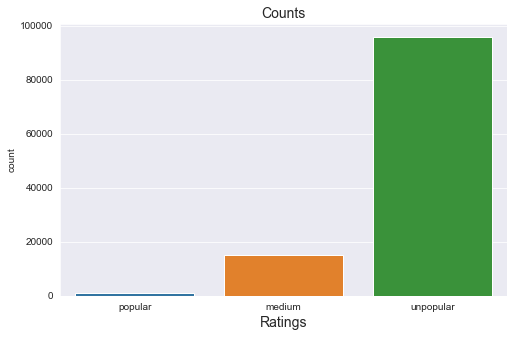

In [15]:
# simple count of the ratings
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='pop_rating', data=classified)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

This really drives home the disparity.

# Correlations
First, let's take a look at the correlation coefficients for the data features, and use a correlation heat map to help visualize how the different variables relate to each other.

In [24]:
# Generat correlation table
spotify_ordered.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
acousticness,1.000000,-0.359877,0.049087,-0.737737,0.320986,-0.113883,-0.631248,-0.125848,-0.218866,-0.182997,-0.152114
danceability,-0.359877,1.000000,-0.147489,0.294570,-0.341741,-0.119567,0.443299,0.251208,0.063790,0.457178,0.194267
duration_ms,0.049087,-0.147489,1.000000,-0.041508,0.073682,-0.006783,-0.049664,-0.115628,-0.017789,-0.157237,-0.038537
energy,-0.737737,0.294570,-0.041508,1.000000,-0.336212,0.205073,0.782896,0.111446,0.235635,0.323009,0.151448
instrumentalness,0.320986,-0.341741,0.073682,-0.336212,1.000000,-0.070851,-0.527086,-0.213433,-0.099311,-0.282644,-0.201522
liveness,-0.113883,-0.119567,-0.006783,0.205073,-0.070851,1.000000,0.072658,0.114989,0.001880,0.011129,-0.039396
loudness,-0.631248,0.443299,-0.049664,0.782896,-0.527086,0.072658,1.000000,0.072990,0.227240,0.329304,0.272248
speechiness,-0.125848,0.251208,-0.115628,0.111446,-0.213433,0.114989,0.072990,1.000000,0.050433,0.129835,0.009084
tempo,-0.218866,0.063790,-0.017789,0.235635,-0.099311,0.001880,0.227240,0.050433,1.000000,0.096504,0.046398
valence,-0.182997,0.457178,-0.157237,0.323009,-0.282644,0.011129,0.329304,0.129835,0.096504,1.000000,0.045007


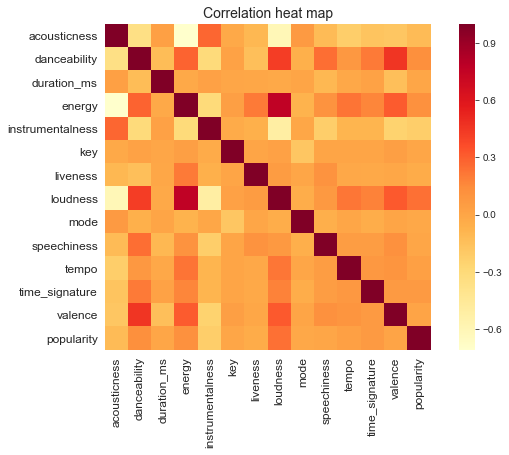

In [22]:
# Generate heat map using seaborn
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.heatmap(spotify.corr(), square=True, cmap='YlOrRd')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

The thing that jumps out right away is that the majority of correlations look pretty weak. Energy, loudness and danceability have fairly strong relationships, which makes sense, and acousticness is naturally opposed to loudness and energy, but there's not much to go on outside of those. Unfortunately, this trend appears to hold true for the popularity variable. 

### Further exploring variable relationships
First, let's create a couple functions that can be used to generate multiple scatterplots

In [52]:
def scat_plot(x, y, hue=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x, y, hue=hue, s=12)
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.legend(fontsize=12)
    plt.show()
    
    
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line
    using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x, y, data=data, scatter_kws={"s": 10}, line_kws={'color':'r'})
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.ylim(-3, 103)
    plt.show()
    

From the table above, loudness has the strongest correlation to popularity. Let's visualize it further. 

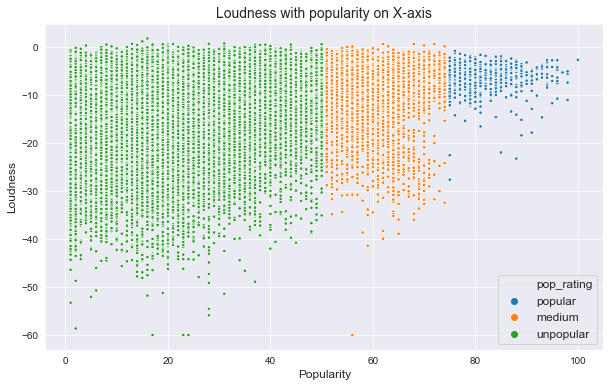

In [37]:
s = spotify_ordered

# Use the scat_plot function to plot loudness against popularity
scat_plot(s.popularity, s.loudness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

The plot above shows the distribution of loudness with popularity on the X-axis. It shows that the highest values of loudness can be found acoss the popularity spectrum, but as the X-axis increases the groupings become more and more concentrated. In other words, loudness doesn't guarantee popularity, but low levels of loudness seem to preclude popularity.

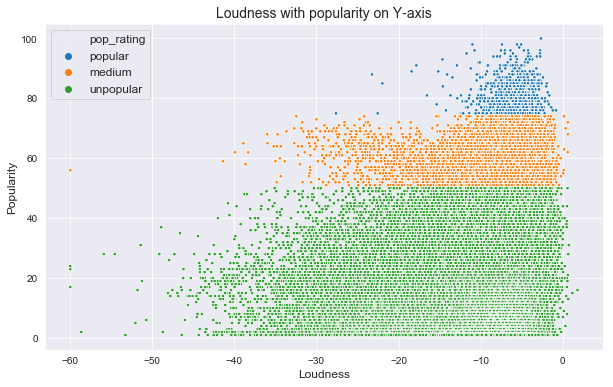

In [39]:
# Flip the axes and revisualize
scat_plot(s.loudness, s.popularity, hue=classified.pop_rating, xlab='Loudness',\
         ylab='Popularity', titl='Loudness with popularity on Y-axis')

<b>Regression line</b><br>
Now plot the data with the regression line using the regress_plot function defined earlier.

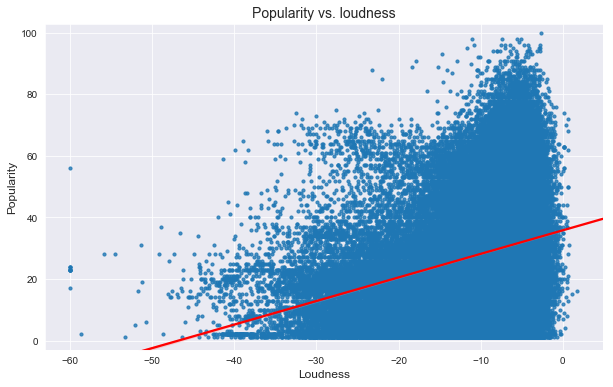

In [53]:
regress_plot('loudness', 'popularity', data=s, xlab='Loudness',\
         ylab='Popularity', titl='Popularity vs. loudness')

As indicated by the correlation table, the plots display the positive relationship between loudness and popularity.